# Time Series forecasting

Udacity course. https://classroom.udacity.com/courses/ud980/

## Understanding the Problem Statement and Dataset
Our data is in a file calld bookings in 'input' directory.
We'll be using this data to forecastthe next six months of room bookings.

In [82]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from math import sqrt
from sklearn.metrics import mean_squared_error

#Importing data
df = pd.read_csv('input/bookings.csv')

#Dropping some columns
df = df.drop(['Year'], axis= 1)
df = df.drop(['Month'], axis= 1)

#Printing head
df.head()


,Bookings,Date
0,383,01/2006
1,366,02/2006
2,250,03/2006
3,318,04/2006
4,334,05/2006


## Aggregating dataset at monthly basis to explain the different methods
* Creating train and test file for modeling.
* Aggregating the dataset at monthly basis



In [25]:
#Creating train and test set 
#Index 120 marks. 96 for train and the rest for test
train=df[0:96] 
test=df[96:]

#Aggregating the dataset at daily level
df.Timestamp = pd.to_datetime(df.Date,format='%m/%Y') 
df.index = df.Timestamp 
df = df.resample('M').mean()


train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
Bookings    96 non-null int64
Date        96 non-null object
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [26]:
train.Timestamp = pd.to_datetime(train.Date,format='%m/%Y') 
train.index = train.Timestamp 
train = train.resample('M').mean() 
test.Timestamp = pd.to_datetime(test.Date,format='%m/%Y') 
test.index = test.Timestamp 
test = test.resample('M').mean()

/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.
/home/emi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


Let’s visualize the data (train and test together) to know how it varies over a time period.

/home/emi/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


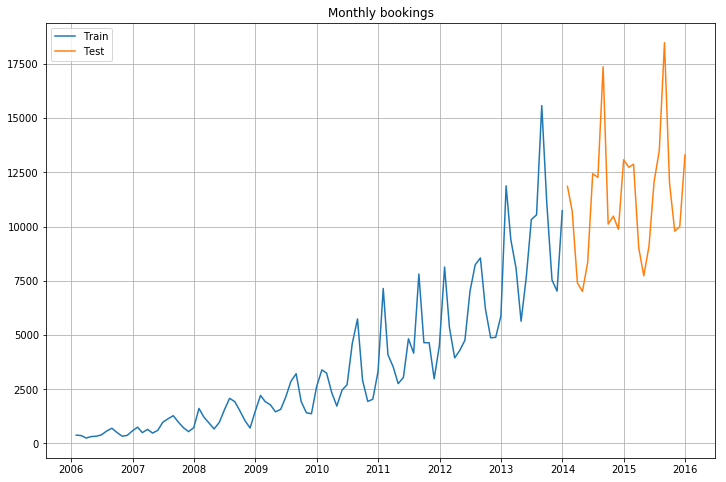

In [128]:
X = train['Bookings'].count
Y = test['Bookings'].count
plt.figure(figsize=(12,8))

plt.plot(train.index, train['Bookings'], label='Train')
plt.plot(test.index,test['Bookings'], label='Test')
plt.legend(loc='best')
plt.title("Monthly bookings")
plt.grid('on')
plt.show()

## Method 1: Start with a Naive Approach
Consider the graph given below. Let’s assume that the y-axis depicts the price of a coin and x-axis depicts the time (days).


![](image.png)
 

We can infer from the graph that the price of the coin is stable from the start. Many a times we are provided with a dataset, which is stable throughout it’s time period. If we want to forecast the price for the next day, we can simply take the last day value and estimate the same value for the next day. Such forecasting technique which assumes that the next expected point is equal to the last observed point is called Naive Method.

![](image1.png)

Now we will implement the Naive method to forecast the prices for test data.

In [197]:
#### TODO
dd= np.asarray(train['Bookings'].count)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]



plt.figure(figsize=(12,8))
plt.plot(train.index, train['Count'], label='Train')
plt.plot(test.index,test['Count'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

IndexError: too many indices for array

## Method 2: – Simple Average
Consider the graph given below. Let’s assume that the y-axis depicts the price of a coin and x-axis depicts the time(days).



We can infer from the graph that the price of the coin is increasing and decreasing randomly by a small margin, such that the average remains constant. Many a times we are provided with a dataset, which though varies by a small margin throughout it’s time period, but the average at each time period remains constant. In such a case we can forecast the price of the next day somewhere similar to the average of all the past days.

Such forecasting technique which forecasts the expected value equal to the average of all previously observed points is called Simple Average technique.



We take all the values previously known, calculate the average and take it as the next value. Of course it won’t be it exact, but somewhat close. As a forecasting method, there are actually situations where this technique works the best.

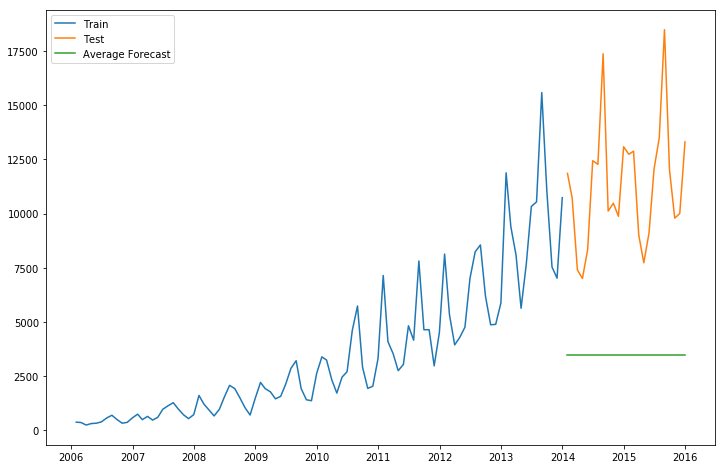

In [78]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Bookings'].mean()
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Bookings'], label='Train')
plt.plot(test.index,test['Bookings'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [ ]:
We will now calculate RMSE to check to accuracy of our model.

In [84]:
rms = sqrt(mean_squared_error(test['Bookings'], y_hat_avg.avg_forecast))
print(rms)


8315.512361444322


We can see that this model didn’t improve our score. Hence we can infer from the score that this method works best when the average at each time period remains constant. Though the score of Naive method is better than Average method, but this does not mean that the Naive method is better than Average method on all datasets. We should move step by step to each model and confirm whether it improves our model or not.

## Method 3 – Moving Average
Consider the graph given below. Let’s assume that the y-axis depicts the price of a coin and x-axis depicts the time(days).

![](image5.png)

We can infer from the graph that the prices of the coin increased some time periods ago by a big margin but now they are stable. Many a times we are provided with a dataset, in which the prices/sales of the object increased/decreased sharply some time periods ago. In order to use the  previous Average method, we have to use the mean of all the previous data, but using all the previous data doesn’t sound right.

Using the prices of the initial period would highly affect the forecast for the next period. Therefore as an improvement over simple average, we will take the average of the prices for last few time periods only. Obviously the thinking here is that only the recent values matter. Such forecasting technique which uses window of time period for calculating the average is called Moving Average technique. Calculation of the moving average involves what is sometimes called a “sliding window” of size n.

Using a simple moving average model, we forecast the next value(s) in a time series based on the average of a fixed finite number ‘p’ of the previous values. Thus, for all i > p

![](image6.png)

A moving average can actually be quite effective, especially if you pick the right p for the series.

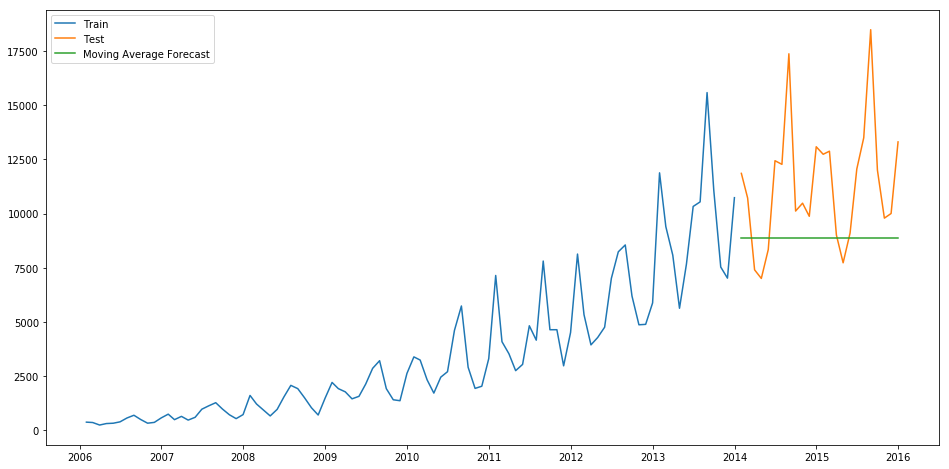

In [89]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['Bookings'].rolling(2).mean().iloc[-1]
plt.figure(figsize=(16,8))
plt.plot(train.index, train['Bookings'], label='Train')
plt.plot(test.index,test['Bookings'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

We chose the data of last 2 months only. We will now calculate RMSE to check to accuracy of our model.

In [91]:
rms = sqrt(mean_squared_error(test['Bookings'], y_hat_avg.moving_avg_forecast))
print(rms)

3676.667864158161


We can see that Naive method outperforms both Average method and Moving Average method for this dataset. Now we will look at Simple Exponential Smoothing method and see how it performs.

An advancement over Moving average method is Weighted moving average method. In the Moving average method as seen above, we equally weigh the past ‘n’ observations. But we might encounter situations where each of the observation from the past ‘n’ impacts the forecast in a different way. Such a technique which weighs the past observations differently is called Weighted Moving Average technique.

A weighted moving average is a moving average where within the sliding window values are given different weights, typically so that more recent points matter more. Ins

![](image7.png)

tead of selecting a window size, it requires a list of weights (which should add up to 1). For example if we pick [0.40, 0.25, 0.20, 0.15] as weights, we would be giving 40%, 25%, 20% and 15% to the last 4 points respectively.



## Method 4 – Simple Exponential Smoothing
After we have understood the above methods, we can note that both Simple average and Weighted moving average lie on completely opposite ends. We would need something between these two extremes approaches which takes into account all the data while weighing the data points differently. For example it may be sensible to attach larger weights to more recent observations than to observations from the distant past. The technique which works on this principle is called Simple exponential smoothing. Forecasts are calculated using weighted averages where the weights decrease exponentially as observations come from further in the past, the smallest weights are associated with the oldest observations:

![](image8.png)

where 0≤ α ≤1 is the smoothing parameter.

The one-step-ahead forecast for time T+1 is a weighted average of all the observations in the series y1,…,yT. The rate at which the weights decrease is controlled by the parameter α.

If you stare at it just long enough, you will see that the expected value ŷx is the sum of two products: α⋅yt and (1−α)⋅ŷ t-1.

Hence, it can also be written as :

![](image9.png)

So essentially we’ve got a weighted moving average with two weights: α and 1−α.

As we can see, 1−α is multiplied by the previous expected value ŷ x−1 which makes the expression recursive. And this is why this method is called Exponential. The forecast at time t+1 is equal to a weighted average between the most recent observation yt and the most recent forecast ŷ t|t−1.

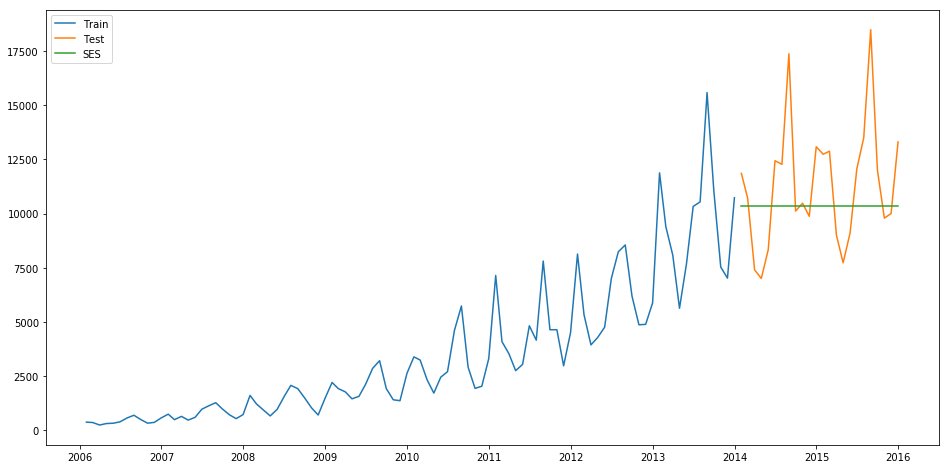

In [94]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Bookings'])).fit(smoothing_level=0.9,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train.index, train['Bookings'], label='Train')
plt.plot(test.index,test['Bookings'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()


We will now calculate RMSE to check to accuracy of our model.

In [96]:
rms = sqrt(mean_squared_error(test['Bookings'], y_hat_avg.SES))
print(rms)

2911.005572337132


## Method 5 – Holt’s Linear Trend method
We have now learnt several methods to forecast but we can see that these models don’t work well on data with high variations. Consider that the price of the bitcoin is increasing.


![](image10.png)
 

If we use any of the above methods, it won’t take into account this trend. Trend is the general pattern of prices that we observe over a period of time. In this case we can see that there is an increasing trend.

Although each one of these methods can be applied to the trend as well.  E.g. the Naive method would assume that trend between last two points is going to stay the same, or we could average all slopes between all points to get an average trend, use a moving trend average or apply exponential smoothing.

But we need a method that can map the trend accurately without any assumptions. Such a method that takes into account the trend of the dataset is called Holt’s Linear Trend method.

Each Time series dataset can be decomposed into it’s componenets which are Trend, Seasonality and Residual. Any dataset that follows a trend can use Holt’s linear trend method for forecasting.

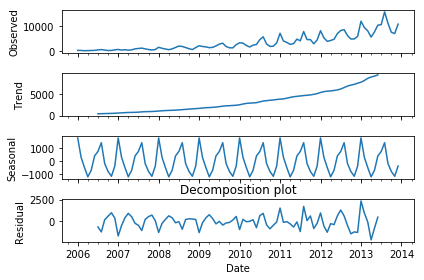

In [103]:
import statsmodels.api as sm

sm.tsa.seasonal_decompose(train['Bookings']).plot()

result = sm.tsa.stattools.adfuller(train['Bookings'])
plt.title('Decomposition plot')
plt.show()

We can see from the graphs obtained that this dataset follows an increasing trend. Hence we can use Holt’s linear trend to forecast the future prices.

Holt extended simple exponential smoothing to allow forecasting of data with a trend. It is nothing more than exponential smoothing applied to both level(the average value in the series) and trend. To express this in mathematical notation we now need three equations: one for level, one for the trend and one to combine the level and trend to get the expected forecast ŷ

![](image11.png)

The values we predicted in the above algorithms are called Level. In the above three equations, you can notice that we have added level and trend to generate the forecast equation.

As with simple exponential smoothing, the level equation here shows that it is a weighted average of observation and the within-sample one-step-ahead forecast The trend equation shows that it is a weighted average of the estimated trend at time t based on ℓ(t)−ℓ(t−1) and b(t−1), the previous estimate of the trend.

We will add these equations to generate Forecast equation. We can also generate a multiplicative forecast equation by multiplying trend and level instead of adding it. When the trend increases or decreases linearly, additive equation is used whereas when the trend increases of decreases exponentially, multiplicative equation is used.Practice shows that multiplicative is a more stable predictor, the additive method however is simpler to understand.

![](image12.png)

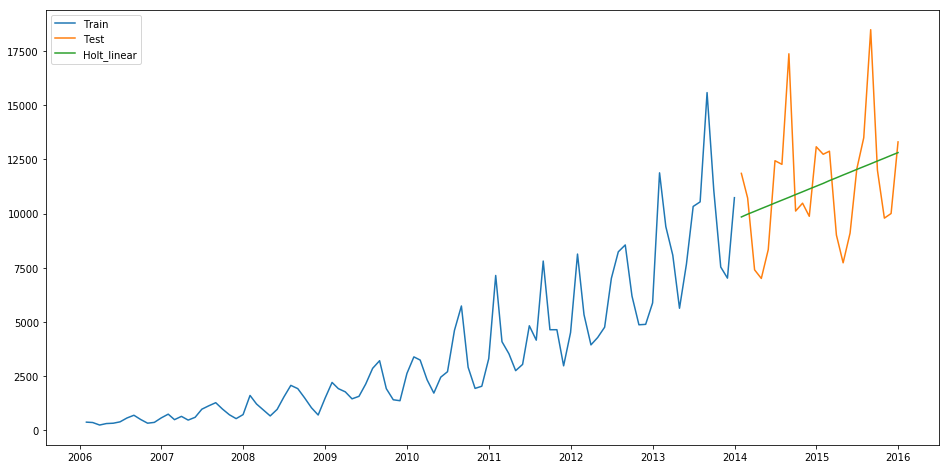

In [137]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train['Bookings'])).fit(smoothing_level = 0.5,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train.index, train['Bookings'], label='Train')
plt.plot(test.index,test['Bookings'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

We will now calculate RMSE to check to accuracy of our model.

In [138]:
rms = sqrt(mean_squared_error(test['Bookings'], y_hat_avg.Holt_linear))
print(rms)

2681.032229524646


We can see that this method maps the trend accurately and hence provides a better solution when compared with above models. We can still tune the parameters to get even a better model.

## Method 6 – Holt-Winters Method
So let’s introduce a new term which will be used in this algorithm. Consider a hotel located on a hill station. It experiences high visits during the summer season whereas the visitors during the rest of the year are comparatively very less. Hence the profit earned by the owner will be far better in summer season than in any other season. This pattern will repeat itself every year. Such a repetition is called Seasonality. Datasets which show a similar set of pattern after fixed intervals of a time period suffer from seasonality.

![](image13.png)

The above mentioned models don’t take into account the seasonality of the dataset while forecasting. Hence we need a method that takes into account both trend and seasonality to forecast future prices. One such algorithm that we can use in such a scenario is Holt’s Winter method. The idea behind triple exponential smoothing(Holt’s Winter) is to apply exponential smoothing to the seasonal components in addition to level and trend.

Using Holt’s winter method will be the best option among the rest of the models beacuse of the seasonality factor. The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — one for the level ℓt, one for trend bt and one for the seasonal component denoted by st, with smoothing parameters α, β and γ.


![](image14.png)

where s is the length of the seasonal cycle, for 0 ≤ α ≤ 1, 0 ≤ β ≤ 1 and 0 ≤ γ ≤ 1.

The level equation shows a weighted average between the seasonally adjusted observation and the non-seasonal forecast for time t. The trend equation is identical to Holt’s linear method. The seasonal equation shows a weighted average between the current seasonal index, and the seasonal index of the same season last year (i.e., s time periods ago).

 

In this method also, we can implement both additive and multiplicative technique.  The additive method is preferred when the seasonal variations are roughly constant through the series, while the multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series.

/home/emi/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


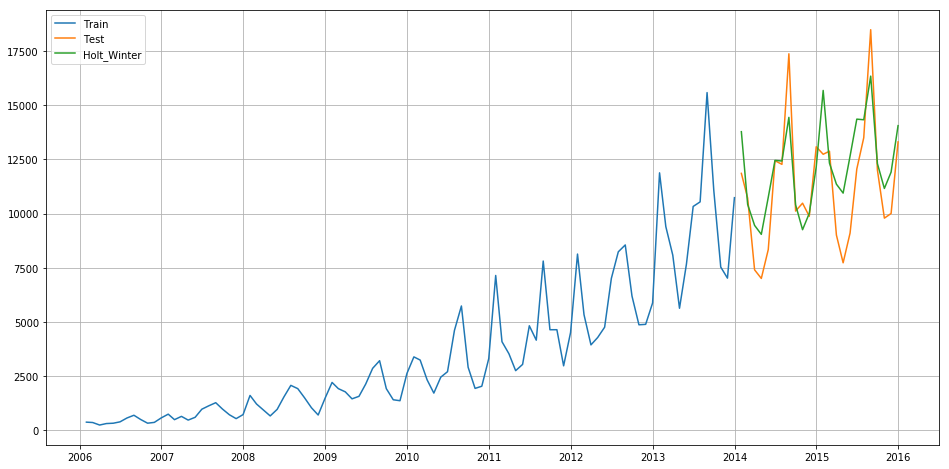

In [193]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Bookings']),
                            seasonal_periods=12,
                            trend='add', 
                            seasonal='add',).fit(smoothing_level = 0.7, optimized=True)
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot(train.index, train['Bookings'], label='Train')
plt.plot(test.index,test['Bookings'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.grid('on')
plt.show()

In [194]:
rms = sqrt(mean_squared_error(test['Bookings'], y_hat_avg.Holt_Winter))
print(rms)

1860.8735902750327
